### K-means Example

dataset source
https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information

In [5]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

np.random.seed(109)

### Show all data frame

In [6]:
train_df = pandas.read_csv('financials.csv')
train_df = train_df[train_df['Price/Earnings'].notna() & train_df['Market Cap'].notna()]
train_df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Scaler for standardization

In [7]:
def scaler(X):
    X_mean = X.mean(axis=0, keepdims=True)
    X_std = X.std(axis=0, keepdims=True)
    X_scaled = (X - X_mean) / X_std
    
    return X_scaled, X_mean, X_std

### Plot scaled dataset

X shape : (503, 2)
X_scaled shape : (503, 2)


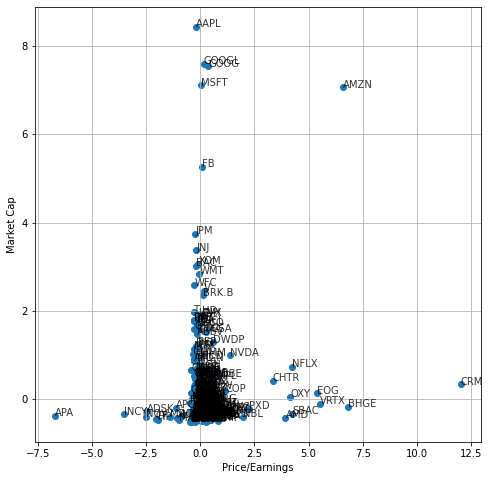

In [17]:
# 4 : Price/Earnings
# 9 : Market Cap
indexes = [4, 9]
X = train_df.values[:, indexes].astype(np.float)
print('X shape :', X.shape)

X_scaled, X_mean, X_std = scaler(X)
print('X_scaled shape :', X_scaled.shape)

plt.figure(figsize=[8, 8])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
for i, symbol in enumerate(train_df['Symbol'].values):
    plt.annotate(symbol, (X_scaled[i, 0], X_scaled[i, 1]), alpha=0.8)
plt.grid()
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')
plt.show()

### Do K-means & plot clusters

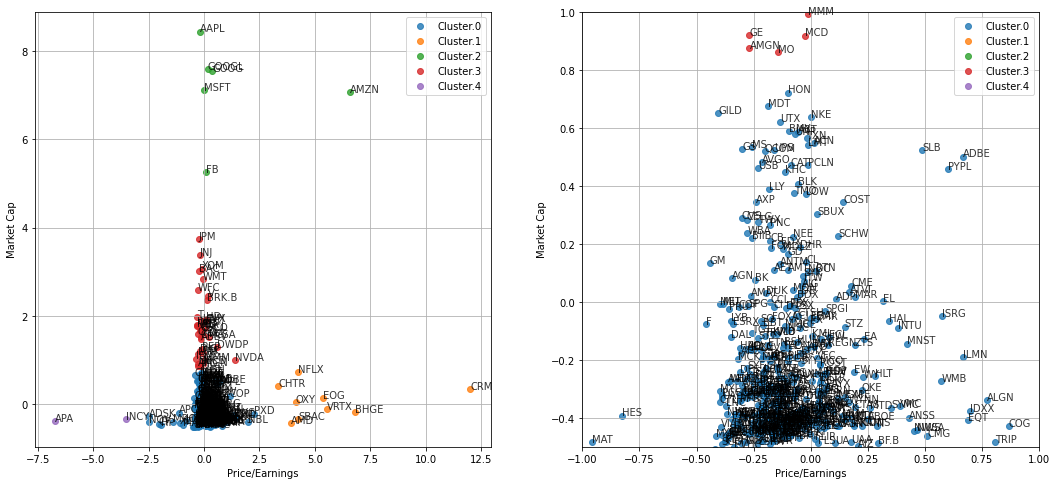

In [12]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters).fit(X_scaled)

plt.figure(figsize=[18, 8])
plt.subplot(1, 2, 1)
for i in range(n_clusters):
    plt.scatter(X_scaled[kmeans.labels_==i, 0], X_scaled[kmeans.labels_==i, 1], alpha=0.8, label='Cluster.'+str(i))
for i, symbol in enumerate(train_df['Symbol'].values):
    plt.annotate(symbol, (X_scaled[i, 0], X_scaled[i, 1]), alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')

plt.subplot(1, 2, 2)
for i in range(n_clusters):
    plt.scatter(X_scaled[kmeans.labels_==i, 0], X_scaled[kmeans.labels_==i, 1], alpha=0.8, label='Cluster.'+str(i))    
for i, symbol in enumerate(train_df['Symbol'].values):
    plt.annotate(symbol, (X_scaled[i, 0], X_scaled[i, 1]), alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')
plt.xlim([-1.0, 1.0])
plt.ylim([-0.5, 1.0])
plt.show()


### Show cluster details

In [10]:
train_df[kmeans.labels_==2]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.00,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.89,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67,http://www.sec.gov/cgi-bin/browse-edgar?action...
30,AMZN,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.00,812.5000,6.858734e+11,1.613200e+10,3.927053,24.28,http://www.sec.gov/cgi-bin/browse-edgar?action...
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.1200,8.095080e+11,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...
187,FB,"Facebook, Inc.",Information Technology,171.58,27.90,0.000000,5.39,195.32,132.4400,5.234230e+11,2.362400e+10,13.241967,7.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.07,63.2200,6.899784e+11,4.107900e+10,7.113097,9.49,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [11]:
train_df[kmeans.labels_==1]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.70,1.119166e+10,3.390000e+08,2.109195,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...
64,BHGE,"Baker Hughes, a GE Company",Energy,27.50,305.56,2.499132,-0.31,57.730,28.03,3.299571e+10,2.850000e+08,1.939005,2.25,http://www.sec.gov/cgi-bin/browse-edgar?action...
103,CHTR,Charter Communications,Consumer Discretionary,348.65,162.92,0.000000,34.08,408.830,308.30,8.670888e+10,1.469400e+10,2.120863,2.27,http://www.sec.gov/cgi-bin/browse-edgar?action...
171,EOG,EOG Resources,Energy,101.04,246.44,0.633390,-1.98,119.000,81.99,6.116403e+10,3.692749e+09,8.023020,4.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
326,NFLX,Netflix Inc.,Information Technology,250.10,200.08,0.000000,1.25,286.810,138.26,1.148054e+11,8.090280e+08,9.861594,30.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
346,OXY,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.090,57.20,5.346769e+10,5.205000e+09,6.044895,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
403,CRM,Salesforce.com,Information Technology,104.03,520.15,0.000000,0.27,114.520,79.63,7.948912e+10,9.258040e+08,10.373879,8.81,http://www.sec.gov/cgi-bin/browse-edgar?action...
404,SBAC,SBA Communications,Real Estate,159.85,199.81,0.000000,0.62,177.670,103.51,1.957203e+10,1.074240e+09,15.189207,91.04,http://www.sec.gov/cgi-bin/browse-edgar?action...
475,VRTX,Vertex Pharmaceuticals Inc,Health Care,151.60,252.67,0.000000,1.04,174.955,84.39,3.936939e+10,9.756200e+07,16.185404,21.91,http://www.sec.gov/cgi-bin/browse-edgar?action...
